# Random Forest


#### Prepare a model for glass classification using Random Forest
#### Data Description:

### Task-1 Exploratory Data Analysis (EDA) :
1. Perform exploratory data analysis to understand the structure of the dataset.
2.Check for missing values, outliers, inconsistencies in the data


In [1]:
# Import the Required Libraries from Python
import pandas as pd
import numpy as np

In [2]:
# Load and Read the given Data.
df=pd.read_csv('glass.csv')

In [3]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# Check for missing values.
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Outlier Detection

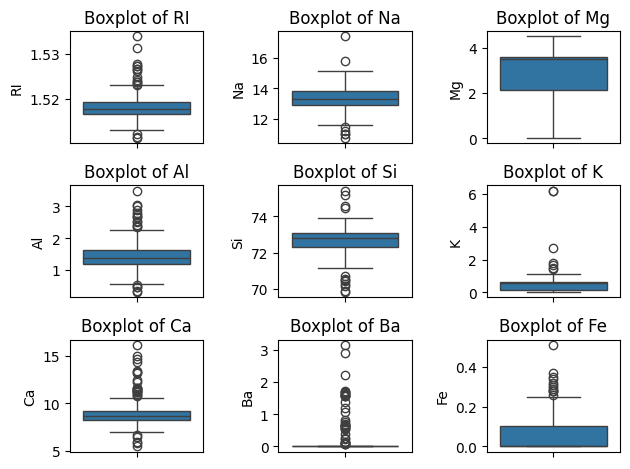

In [7]:
for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

###### RI,Na,Al and Ca columns have some outliers,but they are relatively minor.
###### Mg,Ba and Fe columns have more outliers,which are due to the inherent distribution of these variables.

### Task-2 Data Visualization :
1. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
2.
Analyze any patterns or correlations observed in the data.

##### Histograms for Each Distribution.

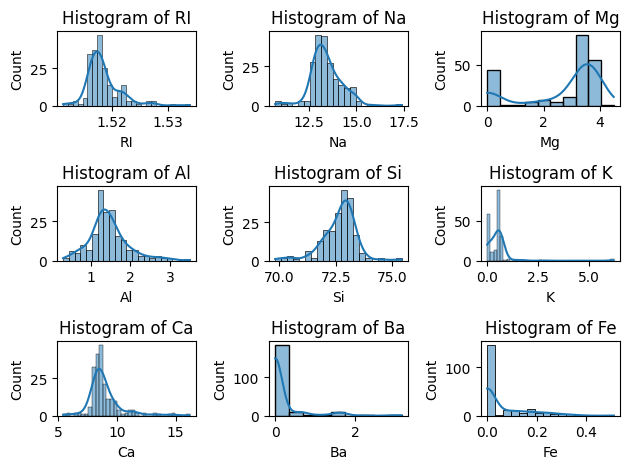

In [8]:
for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

##### Pairplot to visualize pairwise relationships and color by 'Type'.

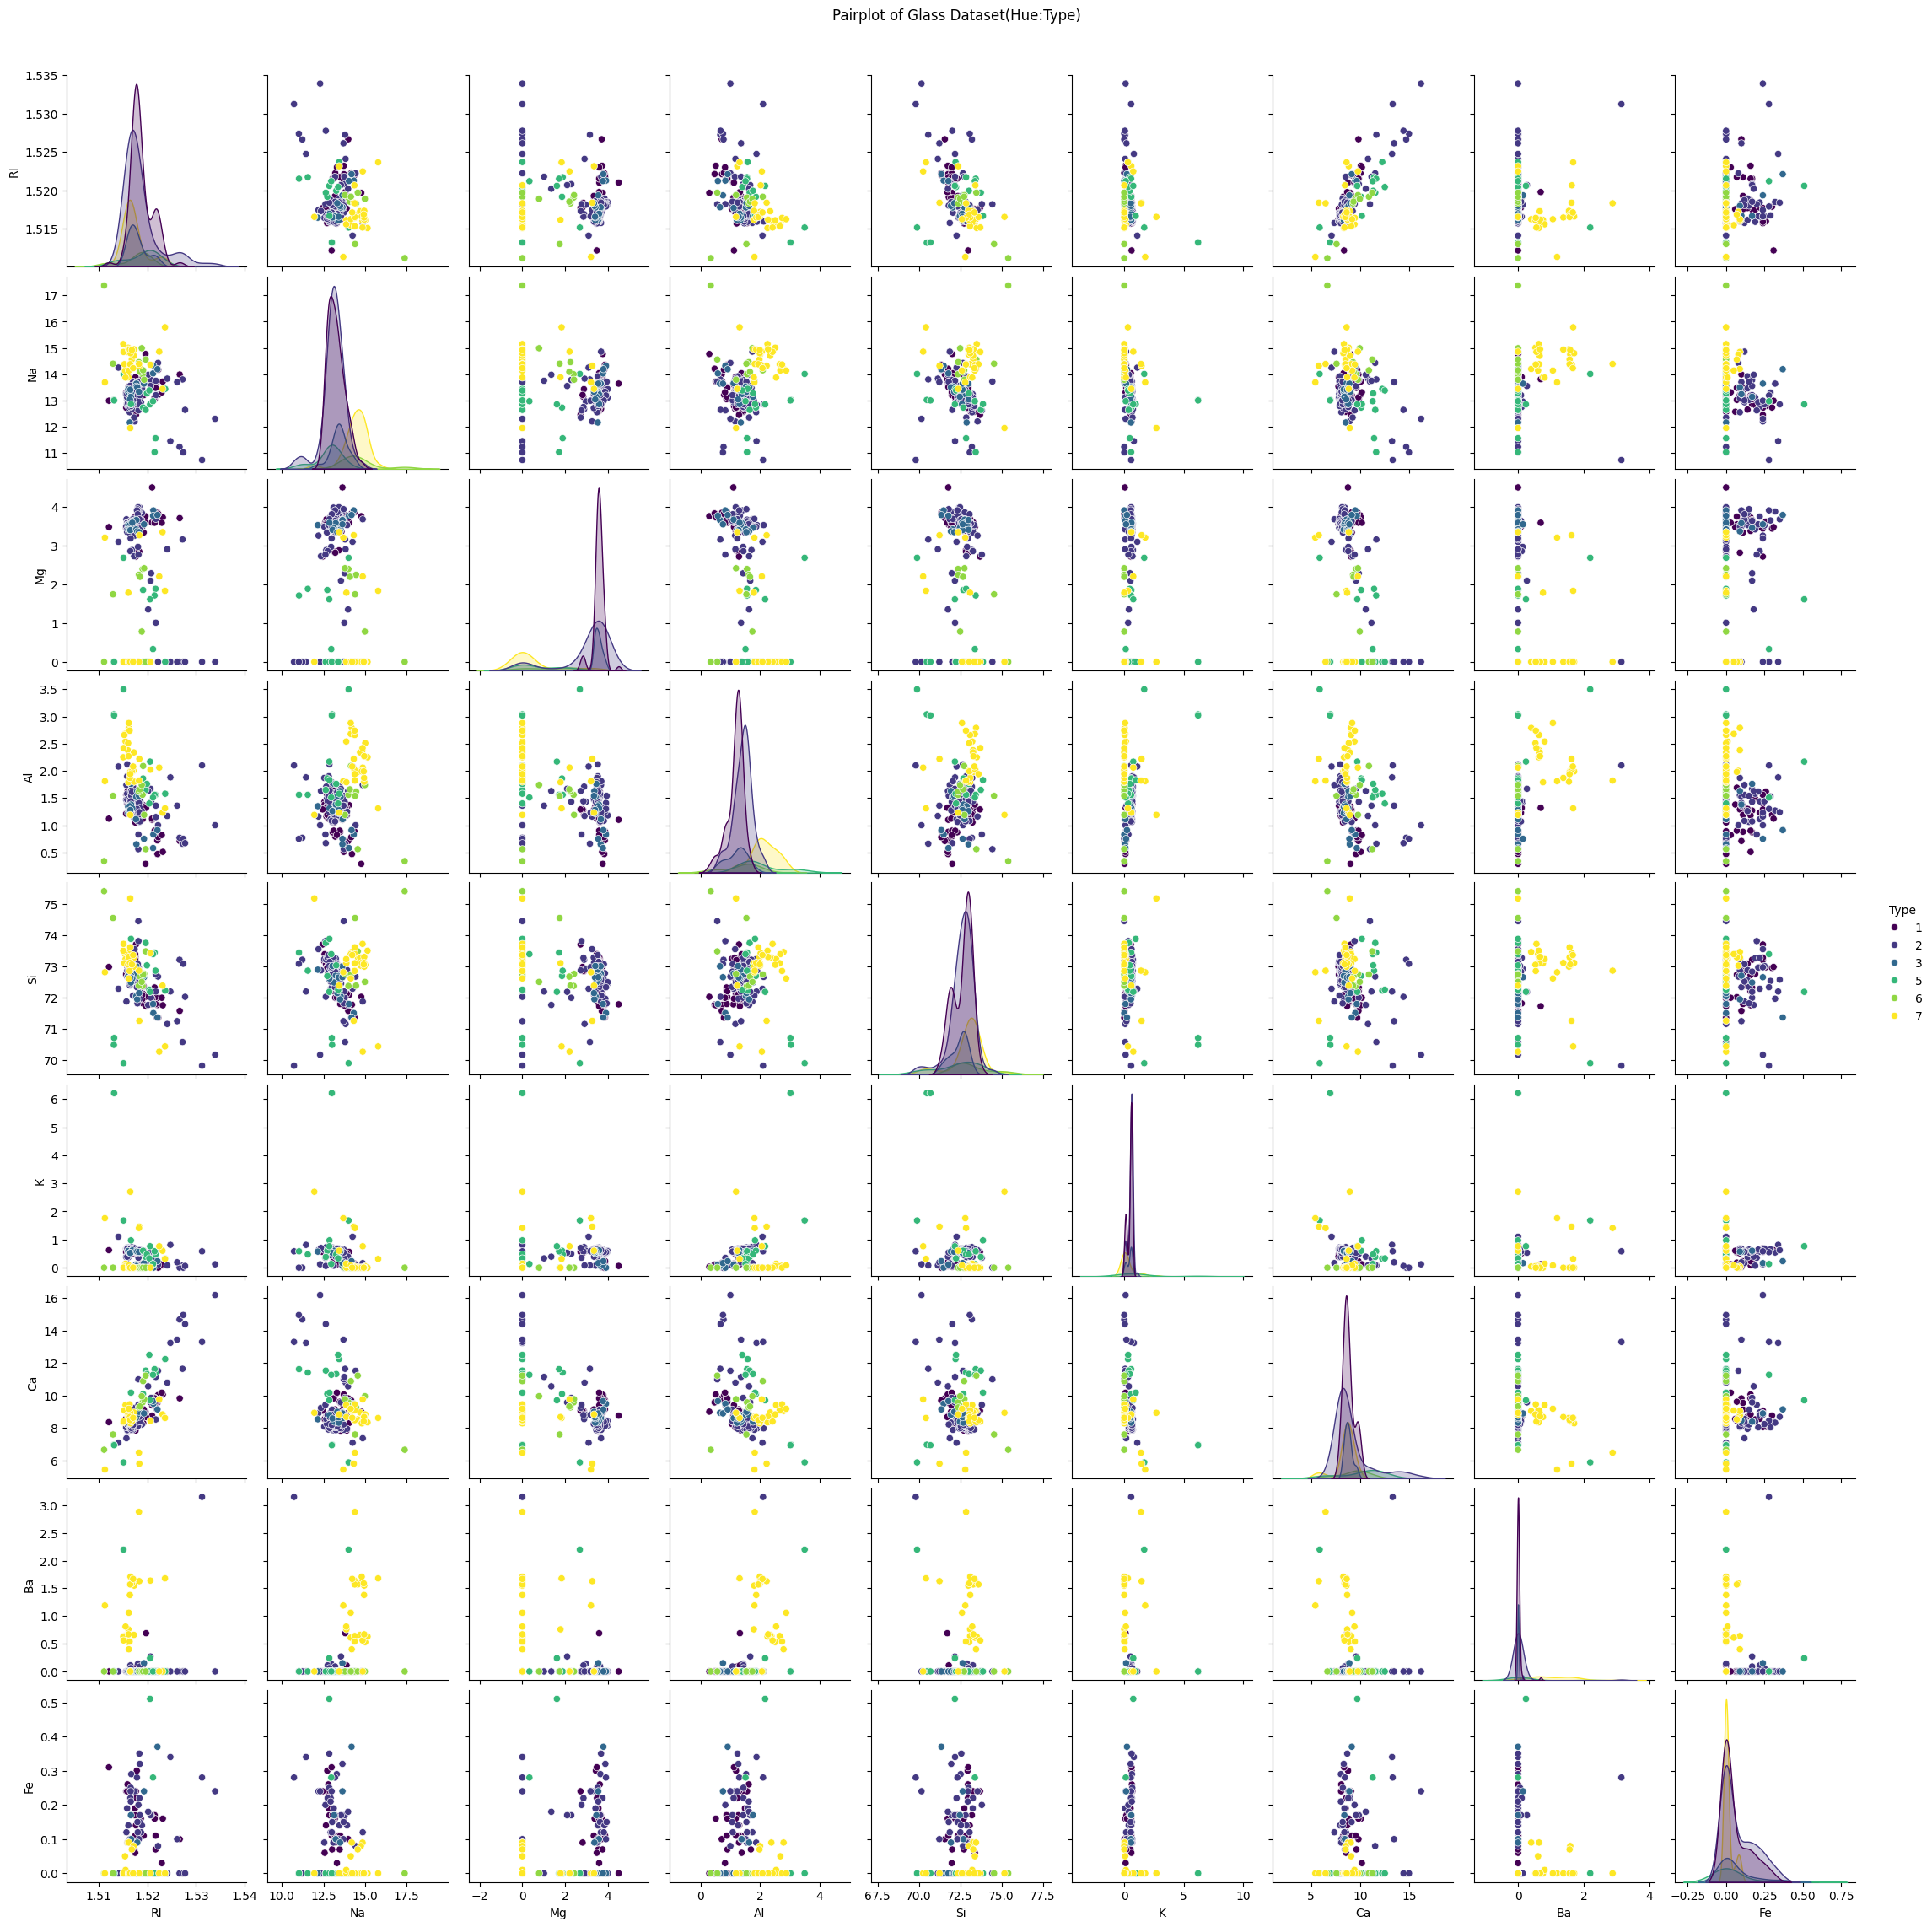

In [9]:
sns.pairplot(df,hue="Type",diag_kind="kde",palette="viridis")
plt.suptitle("Pairplot of Glass Dataset(Hue:Type)",y=1.02)
plt.show()

### Task-3 Data Preprocessing :
1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance datat.


In [10]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


##### Feature Scaling.

In [11]:
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
scaler=StandardScaler()
feature_scale=scaler.fit_transform(df.drop(columns=['Type']))
class_distribution=Counter(df['Type'])

In [12]:
scaled_data=pd.DataFrame(feature_scale,columns=df.columns[:-1])
scaled_data['Type']=df['Type']

In [13]:
X=scaled_data.drop(columns=['Type'])
y=scaled_data['Type']
smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X, y)

In [14]:
scaled_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


### Task-4 Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [15]:
# Summary Statistics.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Random Forest Classification :
Random Forest is a popular machine learning algorithm used for classification and regression tasks due to its high accuracy, robustness, feature importance, versatility, and scalability. Random Forest reduces overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.

In [16]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [17]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


#### Splitting Training Data.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size = 0.2)

#### Training The model.

In [20]:
model=RandomForestClassifier(n_estimators=40)

In [21]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [22]:
y_pred=model.predict(X_test)
y_pred

array([7, 1, 2, 1, 5, 3, 1, 1, 6, 7, 5, 6, 5, 2, 7, 6, 2, 6, 3, 6, 6, 3,
       3, 1, 5, 2, 3, 2, 1, 1, 6, 5, 3, 3, 7, 7, 5, 2, 7, 3, 5, 2, 1, 2,
       6, 3, 5, 3, 3, 2, 7, 3, 6, 5, 3, 1, 1, 1, 2, 7, 7, 2, 6, 1, 2, 3,
       7, 5, 7, 3, 5, 3, 3, 2, 3, 7, 1, 7, 5, 3, 5, 1, 3, 3, 6, 2, 1, 7,
       6, 5, 7, 3])

In [23]:
cm=confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'y_test (Truth)')

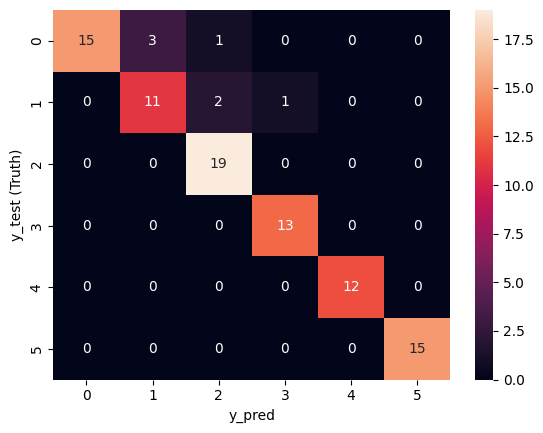

In [24]:
sns.heatmap(cm,annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test (Truth)')

##### Model Evaluation Metrics :

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [30]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='weighted')
    f1=f1_score(y_test,y_pred,average='weighted')
    print("Model Evaluation Metrics:")
    print(f"Accuracy:{accuracy:.2f}")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1-score:{f1:.2f}")
    print("\nClassification Report:\n",classification_report(y_test,y_pred))

### Task-5 Bagging and Boosting Methods :
Apply the Bagging and Boosting methods and compare the results


##### Bagging Using Random Forest.

In [31]:
bagging_model=RandomForestClassifier(random_state=42)
bagging_model.fit(X_train,y_train)
ypred_bagging=bagging_model.predict(X_test)

In [32]:
evaluate_model(y_test,ypred_bagging,"Bagging (Random Forest)")

Model Evaluation Metrics:
Accuracy:0.91
Precision:0.92
Recall:0.91
F1-score:0.91

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.74      0.85        19
           2       0.85      0.79      0.81        14
           3       0.79      1.00      0.88        19
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        15

    accuracy                           0.91        92
   macro avg       0.93      0.92      0.92        92
weighted avg       0.92      0.91      0.91        92



##### Boosting Using Random Forest.

In [33]:
boosting_model=GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train,y_train)
ypred_boosting=boosting_model.predict(X_test)

In [34]:
evaluate_model(y_test,ypred_boosting,"Boosting (Gradient Boosting)")

Model Evaluation Metrics:
Accuracy:0.89
Precision:0.89
Recall:0.89
F1-score:0.89

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.84      0.86        19
           2       0.75      0.64      0.69        14
           3       0.86      0.95      0.90        19
           5       0.92      0.92      0.92        13
           6       1.00      1.00      1.00        12
           7       0.94      1.00      0.97        15

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92



#### 1.Explain Bagging and Boosting methods. How is it different from each other ?
Bagging (Bootstrap Aggregating) and Boosting are two popular ensemble learning techniques that improve model accuracy by combining multiple models.

1. In Bagging, multiple models (like decision trees) are trained on random subsets of the data, and their results are averaged (or majority voted) to produce a final prediction. This method reduces variance and works well on high-variance models, like individual decision trees, making predictions more stable.
2. Boosting builds models sequentially, where each new model corrects the errors of the previous ones. This iterative process often results in higher accuracy, as it adapts to difficult-to-predict patterns, though it can be more prone to overfitting and is computationally intensive..

#### 2. Explain how to handle imbalance in the data.
To handle imbalanced data, techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples for minority classes to balance the dataset. Another approach is undersampling, where samples from the majority class are reduced, making the classes more balanced. You can also adjust model algorithms to assign higher weights to minority class errors, or use ensemble techniques like Balanced Random Forests, which integrate balanced sampling for each tree. These methods help prevent biased predictions towards the majority class, enabling fairer, more accurate outcomes for all classes.